# LOAN STATUS PREDICTION MACHINE LEARNING MODEL 
##### Using Supervised Learning

In [69]:
import pandas as pd

In [187]:
data=pd.read_csv("C:\\Users\\usark\\OneDrive\\Desktop\\ML Datasets\\loan_prediction.csv")
data_adv=pd.read_csv("C:\\Users\\usark\\OneDrive\\Desktop\\ML Datasets\\loan_prediction.csv")

## Data Analysis & Data Understanding:-

In [71]:
data.shape

(614, 13)

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [74]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [75]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [76]:
data.duplicated().sum()

0

## Data PreProcessing:-

In [77]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [78]:
data=data.drop(columns='Loan_ID')

In [79]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [80]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [83]:
data=pd.get_dummies(data,columns=["Gender","Education","Self_Employed","Property_Area","Married"])

In [87]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes
0,0,5849,0.0,NaN,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,1,0
1,1,4583,1508.0,128.0,360.0,1.0,N,0,1,1,0,1,0,1,0,0,0,1
2,0,3000,0.0,66.0,360.0,1.0,Y,0,1,1,0,0,1,0,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,1,0


In [85]:
data.isna().sum()

Dependents                 15
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
Gender_Female               0
Gender_Male                 0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
Married_No                  0
Married_Yes                 0
dtype: int64

In [88]:
data.Dependents

0       0
1       1
2       0
3       0
4       0
       ..
609     0
610    3+
611     1
612     2
613     0
Name: Dependents, Length: 614, dtype: object

In [89]:
data['Dependents'] =data['Dependents'].replace(to_replace="3+",value='4')

In [90]:
data.Dependents.median()

0.0

In [92]:
data.Dependents.fillna(data.Dependents.median(),inplace=True)

In [94]:
data.LoanAmount.median()

128.0

In [95]:
data.LoanAmount.fillna(data.LoanAmount.median(),inplace=True)

In [100]:
data.isnull().sum()

Dependents                  0
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                  0
Loan_Amount_Term            0
Credit_History             50
Loan_Status                 0
Gender_Female               0
Gender_Male                 0
Education_Graduate          0
Education_Not Graduate      0
Self_Employed_No            0
Self_Employed_Yes           0
Property_Area_Rural         0
Property_Area_Semiurban     0
Property_Area_Urban         0
Married_No                  0
Married_Yes                 0
dtype: int64

In [97]:
data.Loan_Amount_Term.median()

360.0

In [99]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median(),inplace=True)

In [101]:
#  Now suppose , the perosns who have no credit history are ineligible for Loan Application.

In [102]:
data.shape

(614, 18)

In [104]:
data=data.dropna()

In [105]:
data.shape

(564, 18)

In [106]:
data.isna().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Married_No                 0
Married_Yes                0
dtype: int64

In [107]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes
0,0,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,1,0
1,1,4583,1508.0,128.0,360.0,1.0,N,0,1,1,0,1,0,1,0,0,0,1
2,0,3000,0.0,66.0,360.0,1.0,Y,0,1,1,0,0,1,0,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,1,0,0,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,1,0,0,0,1,1,0


In [108]:
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [109]:
data.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes
0,0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,1,0,0,0,1,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,1,0,1,0,0,0,1
2,0,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,0,1,0,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,1,0,0,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,1,0,0,0,1,1,0


### Data Scaling

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [112]:
X=data.drop(columns='Loan_Status')

In [113]:
y=data['Loan_Status']

In [115]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes
0,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,0,0,1,1,0
1,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
2,0,3000,0.0,66.0,360.0,1.0,0,1,1,0,0,1,0,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,1,0,0,0,1,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,0,0,1,1,0


In [116]:
scaler=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [117]:
X[scaler]=sc.fit_transform(X[scaler])

In [118]:
X.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Married_No,Married_Yes
0,0,0.061056,-0.619733,-0.201292,0.272871,1.0,0,1,1,0,1,0,0,0,1,1,0
1,1,-0.140994,-0.009090,-0.201292,0.272871,1.0,0,1,1,0,1,0,1,0,0,0,1
2,0,-0.393636,-0.619733,-0.959865,0.272871,1.0,0,1,1,0,0,1,0,0,1,0,1
3,0,-0.460188,0.335105,-0.299173,0.272871,1.0,0,1,0,1,1,0,0,0,1,0,1
4,0,0.085155,-0.619733,-0.042237,0.272871,1.0,0,1,1,0,1,0,0,0,1,1,0


## Visualize the LOAN_STATUS

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
dex=y.value_counts()
dex

1    385
0    179
Name: Loan_Status, dtype: int64

In [140]:
dexPD=pd.DataFrame(dex)
dexPD["Approval"]=["YES","NO"]
dexPD

,Loan_Status,Approval
1,385,YES
0,179,NO


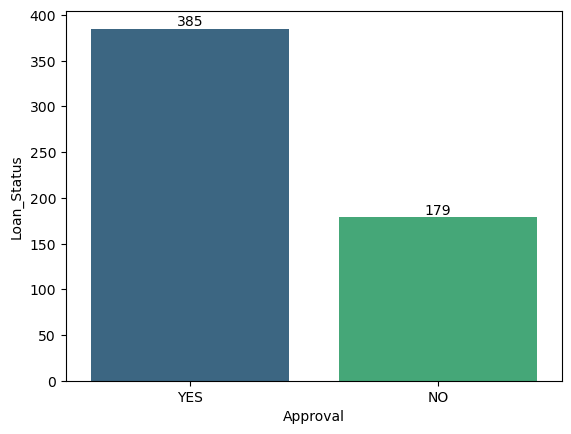

In [148]:
mapp=sns.barplot(x=dexPD.Approval,y=dexPD.Loan_Status,palette="viridis")
for i in mapp.containers:
    mapp.bar_label(i)
plt.show()

In [152]:
#checking data ratio:
dex[1]/dex[0]



2.1508379888268156

In [153]:
#this ratio is ok. not imbalanced.

# Model Making & Assesment the Model

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [155]:
obj1=LogisticRegression()
obj2=SVC()
obj3=DecisionTreeClassifier()
obj4=RandomForestClassifier()


In [156]:
from sklearn.model_selection import train_test_split

In [157]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [158]:
len(X_train)

451

In [159]:
len(X_test)

113

In [160]:
obj1.fit(X_train,Y_train)
obj2.fit(X_train,Y_train)
obj3.fit(X_train,Y_train)
obj4.fit(X_train,Y_train)


RandomForestClassifier()

In [164]:
y1=obj1.predict(X_test)
y2=obj2.predict(X_test)
y3=obj3.predict(X_test)
y4=obj4.predict(X_test)

In [161]:
from sklearn.metrics import accuracy_score

In [165]:
w1=accuracy_score(y1,Y_test)
w2=accuracy_score(y2,Y_test)
w3=accuracy_score(y3,Y_test)
w4=accuracy_score(y4,Y_test)

In [166]:
ls1=[w1,w2,w3,w4]

In [168]:
mylist1=pd.DataFrame(ls1,columns=["Score"])
mylist1["Model"]=["LR","SVM","DT","RF"]
mylist1

,Score,Model
0,0.831858,LR
1,0.823009,SVM
2,0.761062,DT
3,0.805310,RF


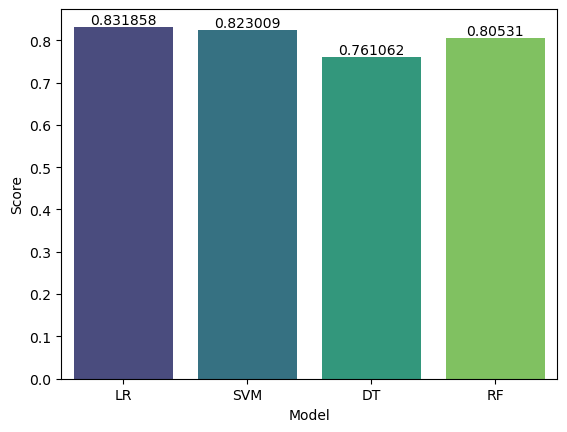

In [173]:
see=sns.barplot(x='Model',y='Score',data=mylist1,palette='viridis')
for label in see.containers:
    see.bar_label(label)
plt.show()

### FROM THIS REPORT , Logistic Regression is Best Fit For Model. But it is without any Feature Selection & Hyperparameter tuning. The Decision May be Changed Later.

# ADVANCEMENT :

## 1>Feature Selection -

<i> using Select K Best </i>

In [188]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [189]:
n=data_adv.Loan_Status

In [191]:
data_adv.drop(columns=["Loan_Status","Loan_ID"],inplace=True)

data_adv.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [202]:
data_adv.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [201]:
data_adv.dropna(inplace=True)

In [203]:
data_adv['Gender'] = data_adv['Gender'].map({'Male':1,'Female':0}).astype('int')
data_adv['Married'] = data_adv['Married'].map({'Yes':1,'No':0}).astype('int')
data_adv['Education'] = data_adv['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data_adv['Self_Employed'] = data_adv['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data_adv['Property_Area'] = data_adv['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
#data_adv['Loan_Status'] = data_adv['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [205]:
n = n.map({'Y':1,'N':0}).astype('int')

In [210]:
data_adv.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1


In [211]:
data_adv['Dependents'] =data_adv['Dependents'].replace(to_replace="3+",value='4')

## Min Max Scaler:

In [208]:
from sklearn.preprocessing import MinMaxScaler

In [215]:
column=['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

In [216]:
data_adv=pd.DataFrame(MinMaxScaler().fit(data_adv).transform(data_adv),columns=column)

In [217]:
data_adv.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1.0,0.25,1.0,0.0,0.054830,0.044567,0.201354,0.72973,1.0,0.0
1,1.0,1.0,0.00,1.0,1.0,0.035250,0.000000,0.096447,0.72973,1.0,0.5
2,1.0,1.0,0.00,0.0,0.0,0.030093,0.069687,0.187817,0.72973,1.0,0.5
3,1.0,0.0,0.00,1.0,0.0,0.072356,0.000000,0.223350,0.72973,1.0,0.5
4,1.0,1.0,0.50,1.0,1.0,0.065145,0.124006,0.436548,0.72973,1.0,0.5


In [219]:
data_adv.shape

(480, 11)

In [261]:
n=n.sample(480)
n.shape

(480,)

In [262]:
bestfeatures = SelectKBest(score_func=chi2, k =10).fit(data_adv, n)

In [263]:
bestfeatures.scores_

array([0.00574093, 0.30955642, 0.51318127, 0.10184504, 0.01682184,
       0.05552434, 0.02316781, 0.0242875 , 0.03106198, 0.25483178,
       0.20652078])

In [264]:
scores=pd.DataFrame(bestfeatures.scores_)

In [265]:
cols=pd.DataFrame(column)

In [266]:
feature_score=pd.concat([cols,scores],axis=1)

In [267]:
feature_score.columns=['Feature',"Score"]
feature_score

,Feature,Score
0,Gender,0.005741
1,Married,0.309556
2,Dependents,0.513181
3,Education,0.101845
4,Self_Employed,0.016822
5,ApplicantIncome,0.055524
6,CoapplicantIncome,0.023168
7,LoanAmount,0.024287
8,Loan_Amount_Term,0.031062
9,Credit_History,0.254832


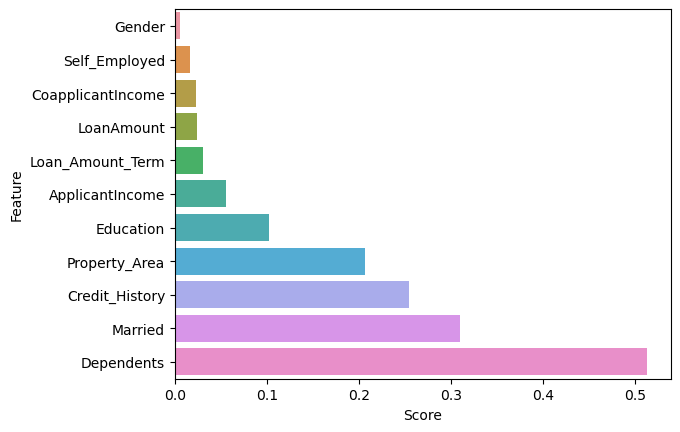

In [268]:
sns.barplot(data=feature_score,y="Feature",x="Score",order=feature_score.sort_values("Score").Feature)
plt.show()

### So from the Feature Selection , The Most Promising Features are:
<br>
1. Self_employed
<br>
2.Credit_History
<br>
3.ApplicantIncome
<br>
4.Coapplicat Income
<br>
5.Education

so use these 5 features & drop others to improve ML performance.

In [269]:
X.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0.061056,-0.619733,1.0,1,0,1,0
1,-0.140994,-0.009090,1.0,1,0,1,0
2,-0.393636,-0.619733,1.0,1,0,0,1
3,-0.460188,0.335105,1.0,0,1,1,0
4,0.085155,-0.619733,1.0,1,0,1,0


In [273]:
X.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
0,0.061056,-0.619733,1.0,1,0,1,0
1,-0.140994,-0.009090,1.0,1,0,1,0
2,-0.393636,-0.619733,1.0,1,0,0,1
3,-0.460188,0.335105,1.0,0,1,1,0
4,0.085155,-0.619733,1.0,1,0,1,0


In [274]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [275]:
X_train.shape

(451, 7)

In [276]:
obj1.fit(X_train,Y_train)
obj2.fit(X_train,Y_train)
obj3.fit(X_train,Y_train)
obj4.fit(X_train,Y_train)

RandomForestClassifier()

In [277]:
y1=obj1.predict(X_test)
y2=obj2.predict(X_test)
y3=obj3.predict(X_test)
y4=obj4.predict(X_test)

In [278]:
w1=accuracy_score(y1,Y_test)
w2=accuracy_score(y2,Y_test)
w3=accuracy_score(y3,Y_test)
w4=accuracy_score(y4,Y_test)

In [279]:
ls2=[w1,w2,w3,w4]

In [280]:
mylist2=pd.DataFrame(ls2,columns=["Score"])
mylist2["Model"]=["LR","SVM","DT","RF"]
mylist2

,Score,Model
0,0.831858,LR
1,0.823009,SVM
2,0.707965,DT
3,0.761062,RF


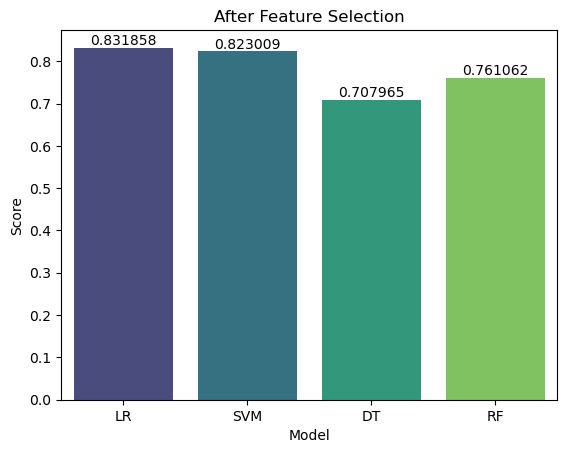

In [281]:
see=sns.barplot(x='Model',y='Score',data=mylist2,palette='viridis')
for label in see.containers:
    see.bar_label(label)
plt.title("After Feature Selection")
plt.show()

In [282]:
mylist1

,Score,Model
0,0.831858,LR
1,0.823009,SVM
2,0.707965,DT
3,0.761062,RF


In [283]:
mylist2

,Score,Model
0,0.831858,LR
1,0.823009,SVM
2,0.707965,DT
3,0.761062,RF


In [304]:
import numpy as np

##  2> HyperParameter Tuning:

<i> Using GridSearchCV 

In [284]:
from sklearn.model_selection import GridSearchCV

In [309]:
model_params = {
    'svm': {
        'model':SVC(gamma='auto'),
        'params' : {
            'C': [10,20,30,40,50,60,70],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [100,200,300,400,500],
            'criterion' : ["gini", "entropy", "log_loss"],
            
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [10,20,30,40]
        }
    }
}

In [310]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, Y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.811453,"{'C': 10, 'kernel': 'linear'}"
1,random_forest,0.780440,"{'criterion': 'log_loss', 'n_estimators': 100}"
2,logistic_regression,0.811453,{'C': 10}


# Save the Model

In [311]:
mdl=SVC(c= 10,kernel='linear')

TypeError: SVC.__init__() got an unexpected keyword argument 'c'

In [ ]:
import joblib